In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

/Users/antoniomanguart/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Cargamos el dataset

In [86]:
df = pd.read_csv('titanic.csv')

In [90]:
df['Pclass'] = df.Pclass.astype(object)

Eliminamos las columnas que no son predicturas

In [91]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Creamos cageogoricas

In [92]:
df = pd.get_dummies(df, drop_first=True)

In [93]:
df['Age'] = df['Age'].fillna(df.Age.mean())


### Crea una regresion logistica

### Concepto odds

Mi equipo gana 1 a 4


Probabilidad de ganar 

Probabilidad perder

Mi equipo gana 5 a 3

Probabilidad que equipo gane 

Probabilidd de perder

¿Qué pasa si divido la probabilidad de ganar entre la probabiliad de perder?

$$odds = \frac{p}{1-p}$$

Calcula los odds de las predicciones del modelo

Los odds pueden llegar a ser muy volatiles, pon el histograma

$$log(odds) = log(\frac{p}{1-p})$$

Pero el log odds no es tan disperso, histograma del log odds

### ¿Y esto que? 

Si tomamos los coeficientes de una regresión logistica como si gura una regresión lineal, obtenemos un numero extraño

$$z = \Theta ^T X $$



In [1]:
# Calcula Z


Resulta ser que z es lo mismo que log odds

### Esto es importante porque de aquí sale sigmoide

$$log(\frac{p}{1-p}) = \Theta ^T X$$


Aplicamos la exponencial en ambos lados:

$$
e^{\Theta ^T X} = \frac{p}{1 - p}
$$

Despejamos \( p \):

$$
p = \frac{e^{\Theta ^T X}}{1 + e^{\Theta ^T X}}
$$

Simplificando

$$
p= \frac{1}{1 + e^{\Theta ^T X}}
$$

Comprobando

### _Comprobamos que Sklearn opera conforme a la teoría_ 

### Comparando diferentes tipos de regresiones

#### Regresion logistica


In [108]:
target = 'Survived'

#### Checando los coeficientes

In [3]:
## Checa los coeficientes, que significan?


  #### Regresion logistica polinomial 2


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#### Polinomio grado 3

#### Analisis del discriminante lineal 

In [5]:
from sklearn import discriminant_analysis


### Junta los datasets

In [151]:
# Bins
bins = 5


# Agrupaciones


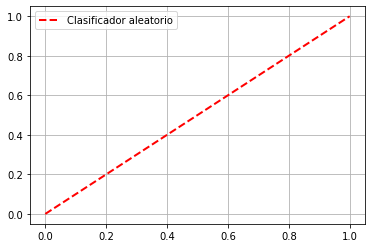

In [8]:
## Grafico de modelos
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()
plt.grid()


¿Cuál es mejor? Veamos la función de perdida en el conjunto de prueba

$$
\text{LogLoss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

In [9]:
from sklearn.metrics import log_loss

Modelo logistico

Modelo polinomio 2

Modelo polinomio 3

Modelo discriminante

In [165]:
log_loss(y_pred=calibracion.modelo_discriminante_lineal, y_true=calibracion.real)

0.4469248818517998

#### Histogramas

In [166]:
real1 = calibracion.query("real == 1")
real0 = calibracion.query("real == 0")

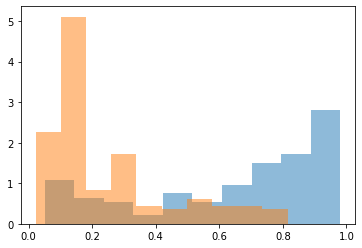

In [167]:
plt.hist(real1.modelo_lineal, density=True, alpha=0.5, bins=10)
plt.hist(real0.modelo_lineal, density=True, alpha=0.5, bins=10)
plt.show()

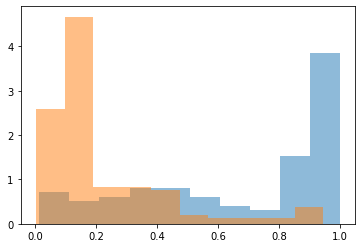

In [168]:
plt.hist(real1.modelo_cuadratico, density=True, alpha=0.5, bins=10)
plt.hist(real0.modelo_cuadratico, density=True, alpha=0.5, bins=10)
plt.show()

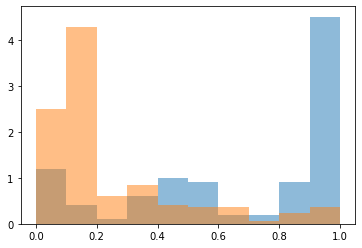

In [169]:
plt.hist(real1.modelo_cubico, density=True, alpha=0.5, bins=10)
plt.hist(real0.modelo_cubico, density=True, alpha=0.5, bins=10)
plt.show()

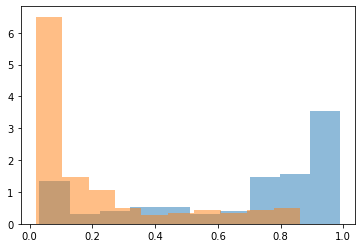

In [170]:
plt.hist(real1.modelo_discriminante_lineal, density=True, alpha=0.5, bins=10)
plt.hist(real0.modelo_discriminante_lineal, density=True, alpha=0.5, bins=10)
plt.show()